# Régression logistique avec descente de gradient et calcul parallèle

In [154]:
library(readxl)
library(ggplot2)
library(devtools)
library(formula.tools)
library(caret)

In [197]:
# test avec data_breast_cancer
data <- read_excel("breast.xlsx")
data

clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,6,6,2,4,10,9,7,1,malignant
4,2,2,1,2,1,2,1,1,begnin
1,1,1,1,2,1,2,1,1,begnin
2,1,1,1,2,1,2,1,1,begnin
4,1,1,1,2,1,2,1,1,begnin
1,1,1,1,2,1,1,1,1,begnin
1,1,1,1,2,1,2,1,1,begnin
5,1,1,1,2,1,2,1,1,begnin
3,1,1,1,2,1,2,1,1,begnin


In [199]:
# Conversion de la variable en 0/1 à intégrer dans une fonction ?

data$classe <- as.factor(data$classe)
levels(data$classe) <- c(0, 1)
data$classe <- as.numeric(levels(data$classe))[data$classe]
data
# y <- matrix(ifelse(data_frame[, 1] == "malignant", 1, 0))

clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,6,6,2,4,10,9,7,1,1
4,2,2,1,2,1,2,1,1,0
1,1,1,1,2,1,2,1,1,0
2,1,1,1,2,1,2,1,1,0
4,1,1,1,2,1,2,1,1,0
1,1,1,1,2,1,1,1,1,0
1,1,1,1,2,1,2,1,1,0
5,1,1,1,2,1,2,1,1,0
3,1,1,1,2,1,2,1,1,0


In [157]:
set.seed(10)
train_index <- createDataPartition(data$classe, p = 0.7, list = F)

In [158]:
train_set <- data[train_index, ]
test_set <- data[-train_index, ]

In [159]:
table(train_set$classe)


  0   1 
318 172 

In [202]:
get_x_y <- function(formula, data) {
    data_frame <- model.frame(formula, data)

    # y <- as.factor(data_frame[, 1])
    # levels(y) <- c(1, 0)
    # y <- matrix(as.integer(y))


    # y <- matrix(ifelse(data_frame[, 1] == "malignant", 1, 0))

    vars = get.vars(formula, data)

    y_name = vars[1]
    x_names = vars[-1]

    y <- as.matrix(data_frame[, y_name])
    x <- data_frame[, x_names]
    x <- as.matrix(data.frame(rep(1, length(y)), x))

    return(list(target = y, features = x, y_name = y_name, x_names = x_names))
}

## Fonction sigmoide

$ \Large h(x) =  \frac{1}{1 + e^{-x} }  $  

![equation](https://latex.codecogs.com/png.latex?%5Clarge%20h%28x%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-x%7D%20%7D)

In [162]:
sigmoid <- function(x) {
    return(1 / (1 + exp(-x)))
}

## Modèle

$ \Large F(X) = X.\theta  $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20F%28X%29%20%3D%20X.%5Ctheta)

In [163]:
x_dot_theta <- function(x, theta) {
    return(x %*% theta)
}

## Fonction de la régression logistique

$ \Large h_ \theta (x) =  \frac{1}{1 + e^{- X.\theta} }  $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20h_%20%5Ctheta%20%28x%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-%20X.%5Ctheta%7D%20%7D)

In [164]:
probability <- function(x, theta) {
    return(sigmoid(x_dot_theta(x, theta))) # nolint
}

## Fonction de cout

$ \Large J(\theta) = -\frac{1}{m} \sum y \times log(\sigma(X.\theta)) + (1-y) \times (1-\sigma(X.\theta)) $  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20J%28%5Ctheta%29%20%3D%20-%5Cfrac%7B1%7D%7Bm%7D%20%5Csum%20y%20%5Ctimes%20log%28%5Csigma%28X.%5Ctheta%29%29%20&plus;%20%281-y%29%20%5Ctimes%20%281-%5Csigma%28X.%5Ctheta%29%29)

In [165]:
cost_function <- function(x, y, theta) {
    m <- nrow(y)
    g <- probability(x, theta) # nolint
    j <- (1 / m) * sum((-y * log(g)) - ((1 - y) * log(1 - g)))
    return(j)
}

## Calcul du gradient

$\Large \frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(\sigma(X.\theta)-y)$  
![equation](https://latex.codecogs.com/gif.latex?%5Cfrac%7B%5Cpartial%20J%28%5Ctheta%29%20%7D%7B%5Cpartial%20%5Ctheta%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20X%5ET.%28%5Csigma%28X.%5Ctheta%29-y%29)



In [166]:
# Gradient : calcul des dérivées partielles de chacun des paramètres de theta
gradient <- function(x, y, theta) {
    m <- nrow(y)
    return((1 / m) * x_dot_theta(t(x), probability(x, theta) - y)) # nolint
}

## Descente de gradient

$\Large \theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$  
![equation](https://latex.codecogs.com/png.latex?%5Clarge%20%5Ctheta%20%3D%20%5Ctheta%20-%20%5Calpha%20%5Cfrac%7B%5Cpartial%20J%28%5Ctheta%29%20%7D%7B%5Cpartial%20%5Ctheta%7D)




In [167]:
batch_gradient_descent <- function(x, y, theta, learning_rate, n_iter) {
    cost_history <- c(cost_function(x, y, theta)) # nolint
    m <- nrow(y)

    for (i in 1:n_iter) {
        # Shuffle data
        random_index <- sample(x = m, size = m)
        # Update theta
        theta <- theta - learning_rate * gradient(x[random_index, ], as.matrix(y[random_index, ]), theta) # nolint
        cost_history <- c(cost_history, cost_function(x, y, theta)) # nolint
    }
    return(list(theta = theta, cost_history = cost_history))
}

In [168]:
stochastic_gradient_descent <- function(x, y, theta, learning_rate, n_iter) {
    cost_history <- c(cost_function(x, y, theta)) # nolint
    m <- nrow(y)
    random_index <- sample(x = m, size = m)
    for (i in 1:n_iter) {
        # Shuffle data
        random_index <- sample(x = m, size = m)
        for (j in 1:m) {
            # Update theta
            y_i <- as.matrix(y[random_index[j], ])
            x_i <- t(as.matrix(x[random_index[j], ]))
            theta <- theta - learning_rate * gradient(x_i, y_i, theta) # nolint
            cost_history <- c(cost_history, cost_function(x, y, theta)) # nolint
        }
    }
    return(list(theta = theta, cost_history = cost_history))
}

In [169]:
mini_batch_gradient_descent <- function(x, y, theta, learning_rate, n_iter, batch_size) {
    cost_history <- c(cost_function(x, y, theta))
    m <- nrow(y)

    for (i in 1:n_iter) {
        # Shuffle data
        random_index <- sample(x = m, size = m)
        x <- as.matrix(x[random_index, ])
        y <- as.matrix(y[random_index, ])
        x_i <- c()
        y_i <- c()

        index <- seq(1, m, batch_size - 1)

        for (j in 1:trunc(m / batch_size)) {
            y_i <- as.matrix(y[index[[j]]:index[[j + 1]], ])
            x_i <- as.matrix(x[index[[j]]:index[[j + 1]], ])
            theta <- theta - learning_rate * gradient(x_i, y_i, theta)
            cost_history <- c(cost_history, cost_function(x, y, theta))
        }
    }
    return(list(theta = theta, cost_history = cost_history))
}

In [219]:
# Gradient descent
fit <- function(formula, data, mode, batch_size, learning_rate, n_iter) {
    x_y <- get_x_y(formula, data) # nolint

    x <- x_y$features
    y <- x_y$target
    y_name <-x_y$y_name
    x_names <-x_y$x_names


    initial_theta <- as.matrix(rnorm(n = dim(x)[2], mean = 0, sd = 1))
    #initial_theta <- as.matrix(replicate(dim(x)[2], 0))

    if (mode == "batch" || (mode == "mini-batch" && batch_size >= nrow(y))) {
        gradient_descent <- batch_gradient_descent(x, y, initial_theta, learning_rate, n_iter) # nolint
    } else if (mode == "stochastic" || (mode == "mini-batch" && batch_size == 1)) { # nolint
        gradient_descent <- stochastic_gradient_descent(x, y, initial_theta, learning_rate, n_iter) # nolint
    } else if (mode == "mini-batch") {
        gradient_descent <- mini_batch_gradient_descent(x, y, initial_theta, learning_rate, n_iter, batch_size) # nolint
    } else {
        return("erreur")
    }

    # Création de l'instance
    inst <- list(formula = formula, x = x, y = y, y_name = y_name, x_names = x_names, mode = mode, batch_size = batch_size, learning_rate = learning_rate, n_iter = n_iter, # nolint
        initial_theta = initial_theta, theta = gradient_descent[[1]], cost_history = gradient_descent[[2]]
    ) # nolint

    attr(inst, "class") <- "Reg.Log"
    return(inst)
}

In [220]:
# Surchage de la fonction print pour l'objet retourné par fit
print.Reg.Log <- function(obj) { # nolint
    cat("Model:", as.character(obj$formula), "\n")
    cat("target:", obj$y_name, "\n")
    cat("features:", obj$x_names, "\n")
    cat("Mode:", obj$mode, "\n")
    cat("Learning rate:", obj$learning_rate, "\n")
    cat("n_iter:", obj$n_iter, "\n")
    cat("Batch size:", obj$batch_size, "\n")
    cat("Coefficient:", obj$theta, "\n")
    cat("Cost history:", obj$cost_history)
}

In [221]:
# Print de l'objet de la classe fit
obj.Reg.Log <- fit(classe ~ ., data, mode = "batch", batch_size = 32, learning_rate = 0.1, n_iter = 4) # nolint
print(obj.Reg.Log)

Model: classe ~ . 
target: classe 
features: clump ucellsize ucellshape mgadhesion sepics bnuclei bchromatin normnucl mitoses 
Mode: batch 
Learning rate: 0.1 
n_iter: 4 
Batch size: 32 
Coefficient: -2.186815 -0.3948907 2.022434 0.2432417 1.549369 -0.3562469 0.4465391 -0.005566342 -2.23114 0.2098647 
Cost history: 3.377 1.473701 1.048973 0.9539503 0.9234463

In [173]:
obj.Reg.Log$theta

rep.1..length.y..,-1.9588852
clump,0.1188014
ucellsize,0.5334054
ucellshape,-0.5295422
mgadhesion,-0.5190198
sepics,0.2916523
bnuclei,1.7116852
bchromatin,0.1343782
normnucl,-1.3928683
mitoses,0.6225417


In [174]:
# Comparaison de print de glm
obj <- glm(classe ~ clump + ucellsize, data = data, family = "binomial")
print(obj)


Call:  glm(formula = classe ~ clump + ucellsize, family = "binomial", 
    data = data)

Coefficients:
(Intercept)        clump    ucellsize  
    -7.1517       0.6174       1.1751  

Degrees of Freedom: 698 Total (i.e. Null);  696 Residual
Null Deviance:	    900.5 
Residual Deviance: 212.3 	AIC: 218.3


In [204]:
# Surcharge de la fonction summary pour l'objet retourné par fit
summary.Reg.Log <- function(obj) {
    cat("Model:", as.character(obj$formula), "\n")
    cat("Mode:", obj$mode, "\n")
    cat("Learning rate:", obj$learning_rate, "\n")
    cat("n_iter:", obj$n_iter, "\n")
    cat("Batch size:", obj$batch_size, "\n")
    cat("Coefficient:", obj$theta, "\n")
    cat("Cost history:", obj$cost_history)
}

In [205]:
# Comparaison de summary de glm
obj <- glm(classe ~ clump + ucellsize, data = data, family = "binomial")
summary(obj)


Call:
glm(formula = classe ~ clump + ucellsize, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7760  -0.2431  -0.0969   0.0303   2.6596  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.15170    0.60084 -11.903  < 2e-16 ***
clump        0.61739    0.09229   6.690 2.24e-11 ***
ucellsize    1.17507    0.12309   9.547  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 900.53  on 698  degrees of freedom
Residual deviance: 212.31  on 696  degrees of freedom
AIC: 218.31

Number of Fisher Scoring iterations: 7


In [295]:
predict2 <- function(Reg.log, newdata, type) {

    # New data control

    if (identical(Reg.log$x_names, colnames(newdata))){
         x <- as.matrix(data.frame(rep(1, nrow(newdata)), newdata))
                
        # Probability of belonging
        probs = probability(x, Reg.log$theta)

        if (type == "classe") {
            return(unlist(ifelse(probs > 0.5, 1, 0)))
        }else if (type == "posterior") {
            return(probs)
        }
    }else{
        return("Erreur")
    }
}


In [243]:
predict <- function(x, theta) {
    predictions <- unlist(ifelse(probability(x, theta) > 0.5, 1, 0))
    return(predictions)
}

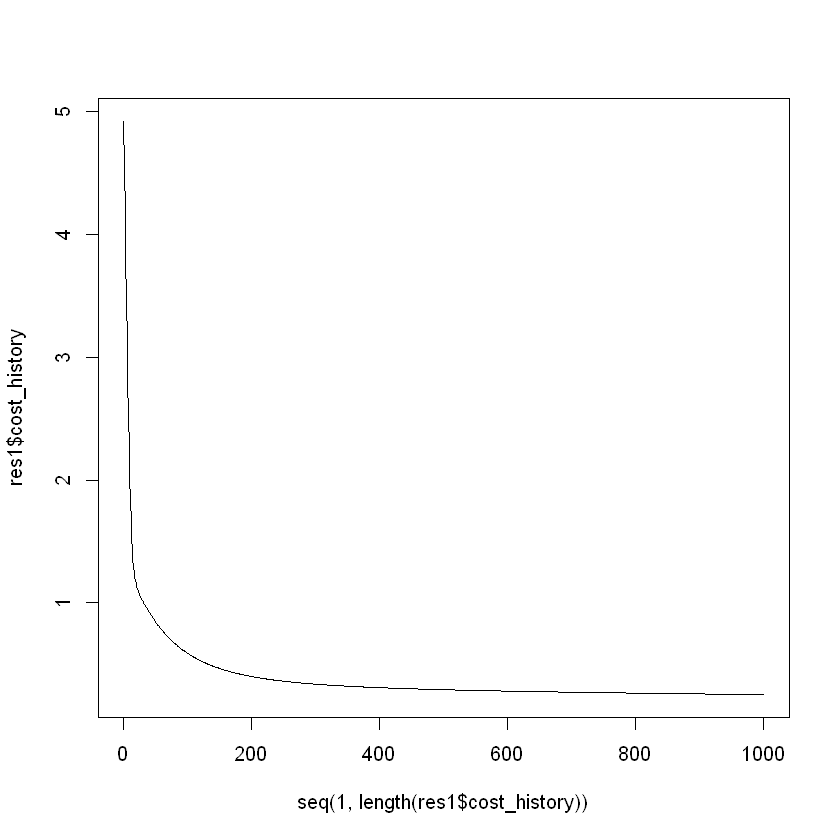

In [320]:
# Courbe parfois inversée ??? -> Cout initial négatif qui semble provoquer une

res1 <- fit(classe ~ ., train_set, mode = "batch", batch_size = 32, learning_rate = 0.01, n_iter = 1000)
plot(seq(1, length(res1$cost_history)), res1$cost_history, type = "l")

In [321]:
y_pred <- predict2(res1, test_set[,res1$x_names], type = "classe")
accuracy <- mean(y_pred == test_set[,res1$y_name])
print(accuracy)

[1] 0.8851675


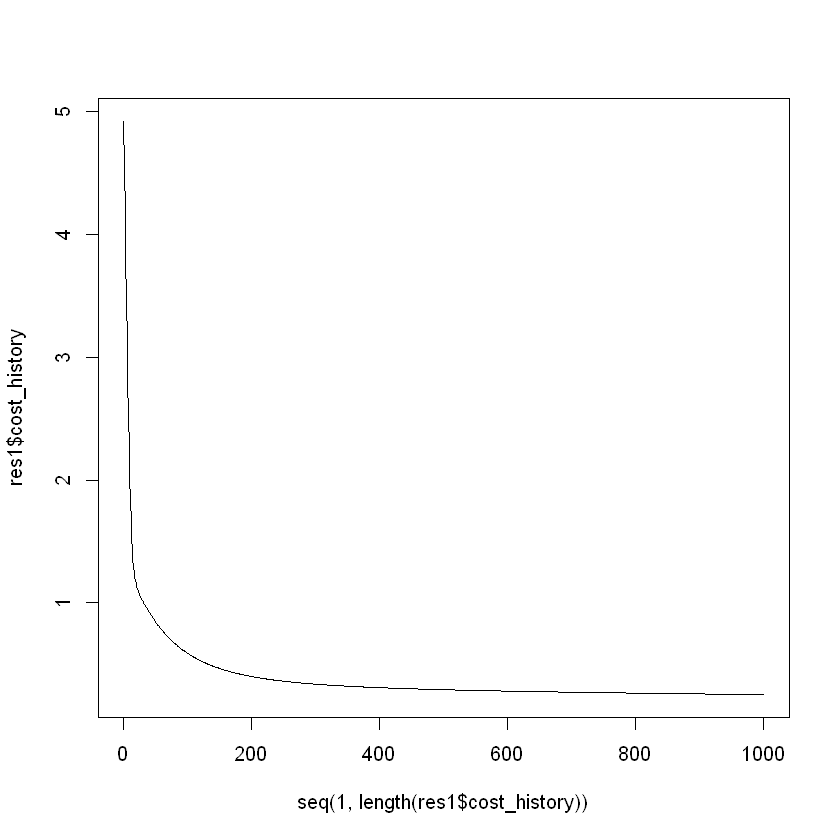

In [323]:
res2 <- fit(classe ~ ., train_set, mode = "stochastic", batch_size = 32, learning_rate = 0.01, n_iter = 10)
plot(seq(1, length(res1$cost_history)), res1$cost_history, type = "l")

In [324]:
y_pred <- predict2(res2, test_set[,res2$x_names], type = "classe")
accuracy <- mean(y_pred == test_set[,res2$y_name])
print(accuracy)

[1] 0.9330144


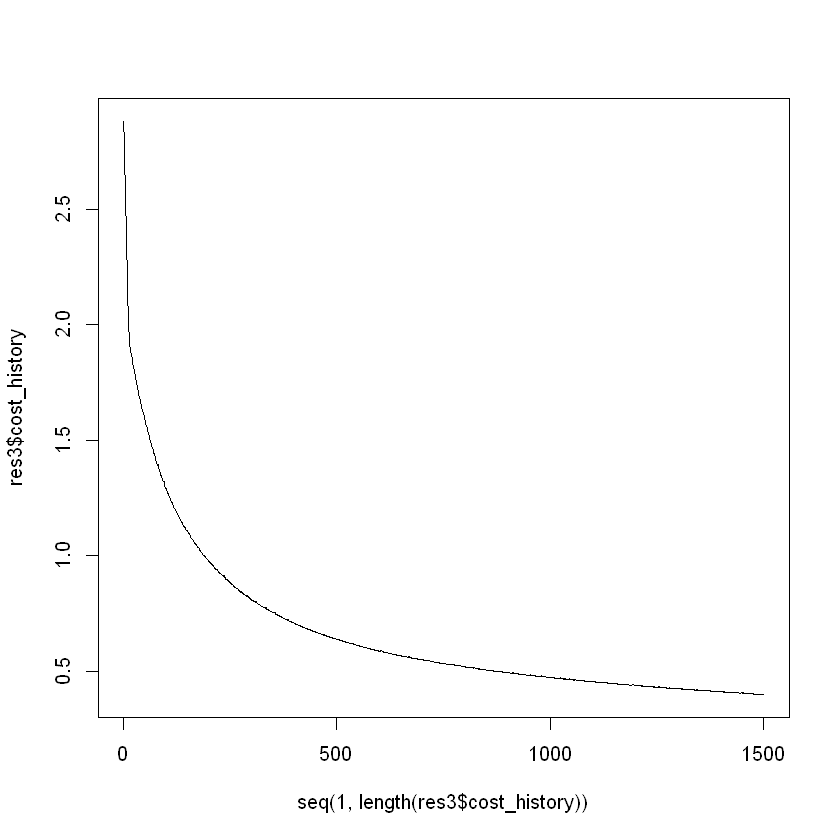

In [333]:
res3 <- fit(classe ~ ., train_set, mode = "mini-batch", batch_size = 32, learning_rate = 0.01, n_iter = 100)
plot(seq(1, length(res3$cost_history)), res3$cost_history, type = "l")

In [331]:
y_pred <- predict2(res3, test_set[,res3$x_names], type = "classe")
accuracy <- mean(y_pred == test_set[,res3$y_name])
print(accuracy)

[1] 0.9617225
